**THE SPARK FOUNDATION**

TASK #1 - Prediction using Supervised ML 

In [ ]:
#Importing important libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
#Importing Data
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(path)
print("Data imported successfully")

Data imported successfully


In [ ]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.shape

(25, 2)

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
print("Total number of null values = " , data.isnull().sum().sum())

Total number of null values =  0


Data Visualization

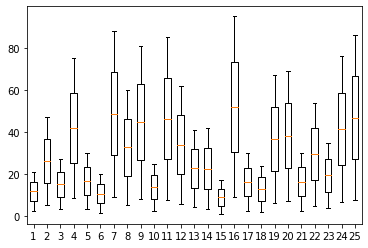

In [ ]:
plt.boxplot(data)
plt.show()

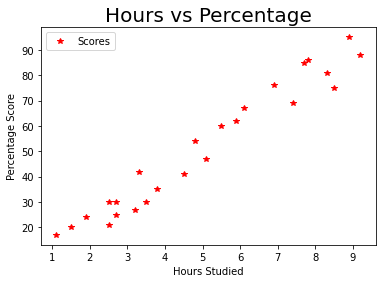

In [ ]:
data.plot(x='Hours' , y='Scores' , style = '*' , color = 'red')
plt.title('Hours vs Percentage' , fontsize = 20)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

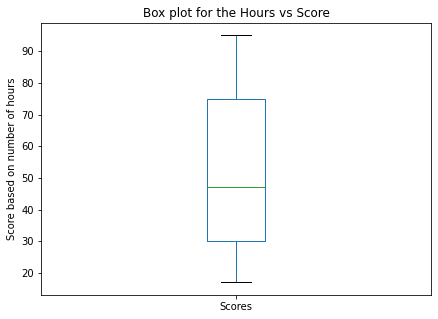

In [ ]:
data_score = data['Scores']
data_score.plot(kind = 'box' , figsize = (7,5))
plt.title('Box plot for the Hours vs Score')
plt.ylabel('Score based on number of hours')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


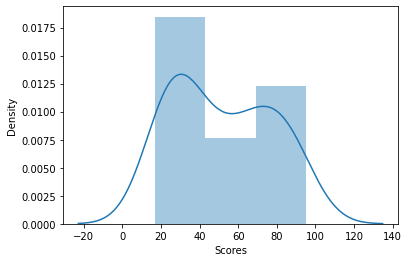

In [ ]:
#sns.distplot(df['Hours'])
sns.distplot(data['Scores'])

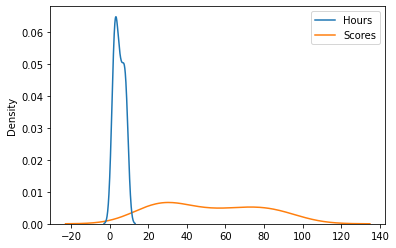

In [ ]:
sns.kdeplot(data=data)

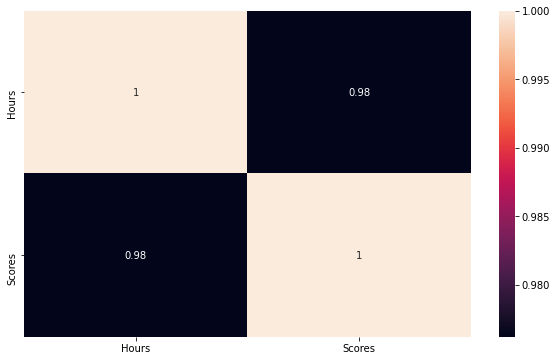

In [ ]:
corre = data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data=corre , annot = True )

In [ ]:
correlations = data.corr(method = 'pearson')
print(correlations)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


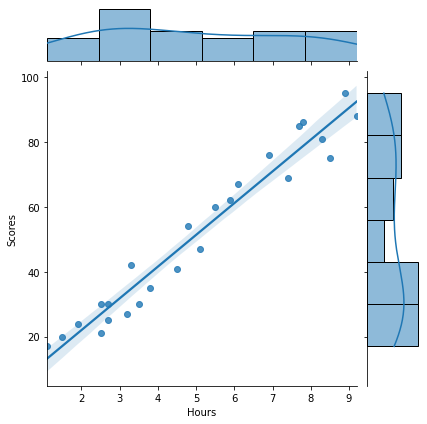

In [ ]:
sns.jointplot("Hours" , "Scores" , data, kind ='reg' )

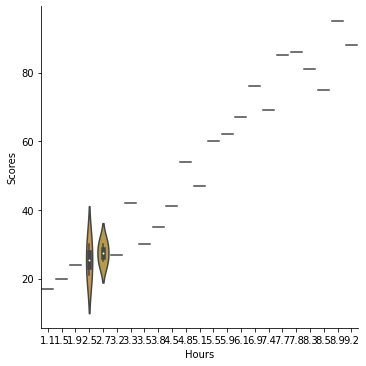

In [ ]:
sns.catplot(x='Hours' , y='Scores', data=data , kind= 'violin')

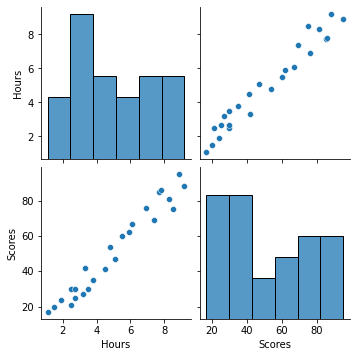

In [ ]:
sns.pairplot(data)

Preparing Data

In [ ]:
X= data.iloc[:,:-1].values
y= data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Splitting Data

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.80 , test_size = 0.20 , random_state = 0)

In [ ]:
print("X train.shape = " , X_train.shape)
print("y train.shape = " , y_train.shape)
print("X test.shape = " , X_test.shape)
print("y test.shape = " , y_test.shape)

X train.shape =  (20, 1)
y train.shape =  (20,)
X test.shape =  (5, 1)
y test.shape =  (5,)


Training the Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_train)
lr1 = LinearRegression()
lr1.fit(X_test , y_test)
print("Training the Model....")
print("Training Completed.")

Training the Model....
Training Completed.


In [ ]:
print("B0 =" ,lr1.intercept_,"\nB1 =" ,lr1.coef_)  
## β0 is intercept and β1 is slope of line  

B0 = 5.264468260511144 
B1 = [8.86232481]


In [ ]:
Y0 = lr1.intercept_ + lr1.coef_*X_train

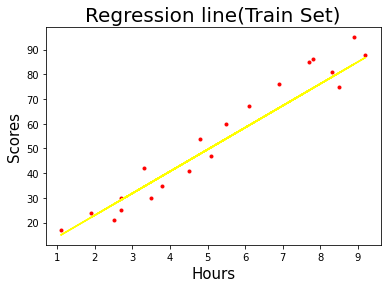

In [ ]:
plt.scatter(X_train,y_train,color="red",marker = '.')
plt.plot(X_train,Y0,color='yellow')
plt.xlabel('Hours',fontsize = 15)
plt.ylabel('Scores',fontsize = 15)
plt.title("Regression line(Train Set)" ,fontsize = 20)
plt.show()

In [ ]:
print("Accuracy of Training learning rate " , lr1.score(X_train,y_train)*100)
print("Accuracy of Testing learning rate " , lr1.score(X_test,y_test)*100)

Accuracy of Training learning rate  93.29875498557209
Accuracy of Testing learning rate  96.1740276155632


Building a Linear Model by Statsmodel.api

In [ ]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.79e-13
Time:                        10:27:16   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Making Predictions

In [ ]:
## Predicting the socres for the test data
y_pred = lr1.predict(X_test)
print(y_pred)

[18.55795548 33.62390767 70.84567189 27.4202803  57.55218467]


In [ ]:
# Now print the Y_test
y_test

array([20, 27, 69, 30, 62])

In [ ]:
data = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
data

,Actual,Predicted
0,20,18.557955
1,27,33.623908
2,69,70.845672
3,30,27.420280
4,62,57.552185


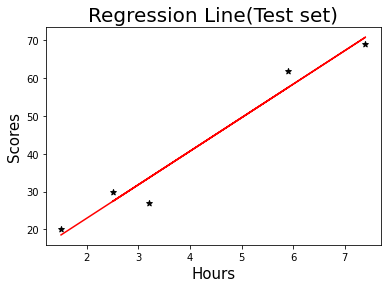

In [ ]:
plt.plot(X_test , y_pred , color = 'red')
plt.scatter(X_test , y_test , color = 'black', marker = '*')
plt.xlabel('Hours',fontsize = 15)
plt.ylabel('Scores',fontsize = 15)
plt.title("Regression Line(Test set)",fontsize = 20)
plt.show()

Accuracy the Model

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)  ## Goodness for fit test

0.9617402761556321

Model Evaluations

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
rootsqe = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
abse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean_Squared_Error        =",mse)
print("Root_Mean_Squared_Error   =",rootsqe)
print("Mean_Absolute_Error       =",abse)

Mean_Squared_Error        = 15.160032976092342
Root_Mean_Squared_Error   = 3.893588701454269
Mean_Absolute_Error       = 3.893588701454269


Predicting the Score

In [ ]:
Prediction_score = lr1.predict([[9.25]])
print("Predicted score for the student studying 9.25 hours per day is :",Prediction_score)

Predicted score for the student studying 9.25 hours per day is : [87.24097279]


### ***Conclusion From the above result we can say that if a student studied for 9.25 hours in a day then student will secured 87.24 MARKS .***